In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi']=(300)
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("/content/ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [4]:
df.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [5]:
df['Fuel_Type']= df['Fuel_Type'].astype('category')
df['Fuel_Type']=df['Fuel_Type'].cat.codes

In [6]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [7]:
df.rename(columns={'Age_08_04':'Age'},inplace=True)
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [8]:
df.isna()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

,0
Price,0
Age,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [10]:
df.describe()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,1.868384,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,0.371572,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,2.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,2.000000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,2.000000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,2.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

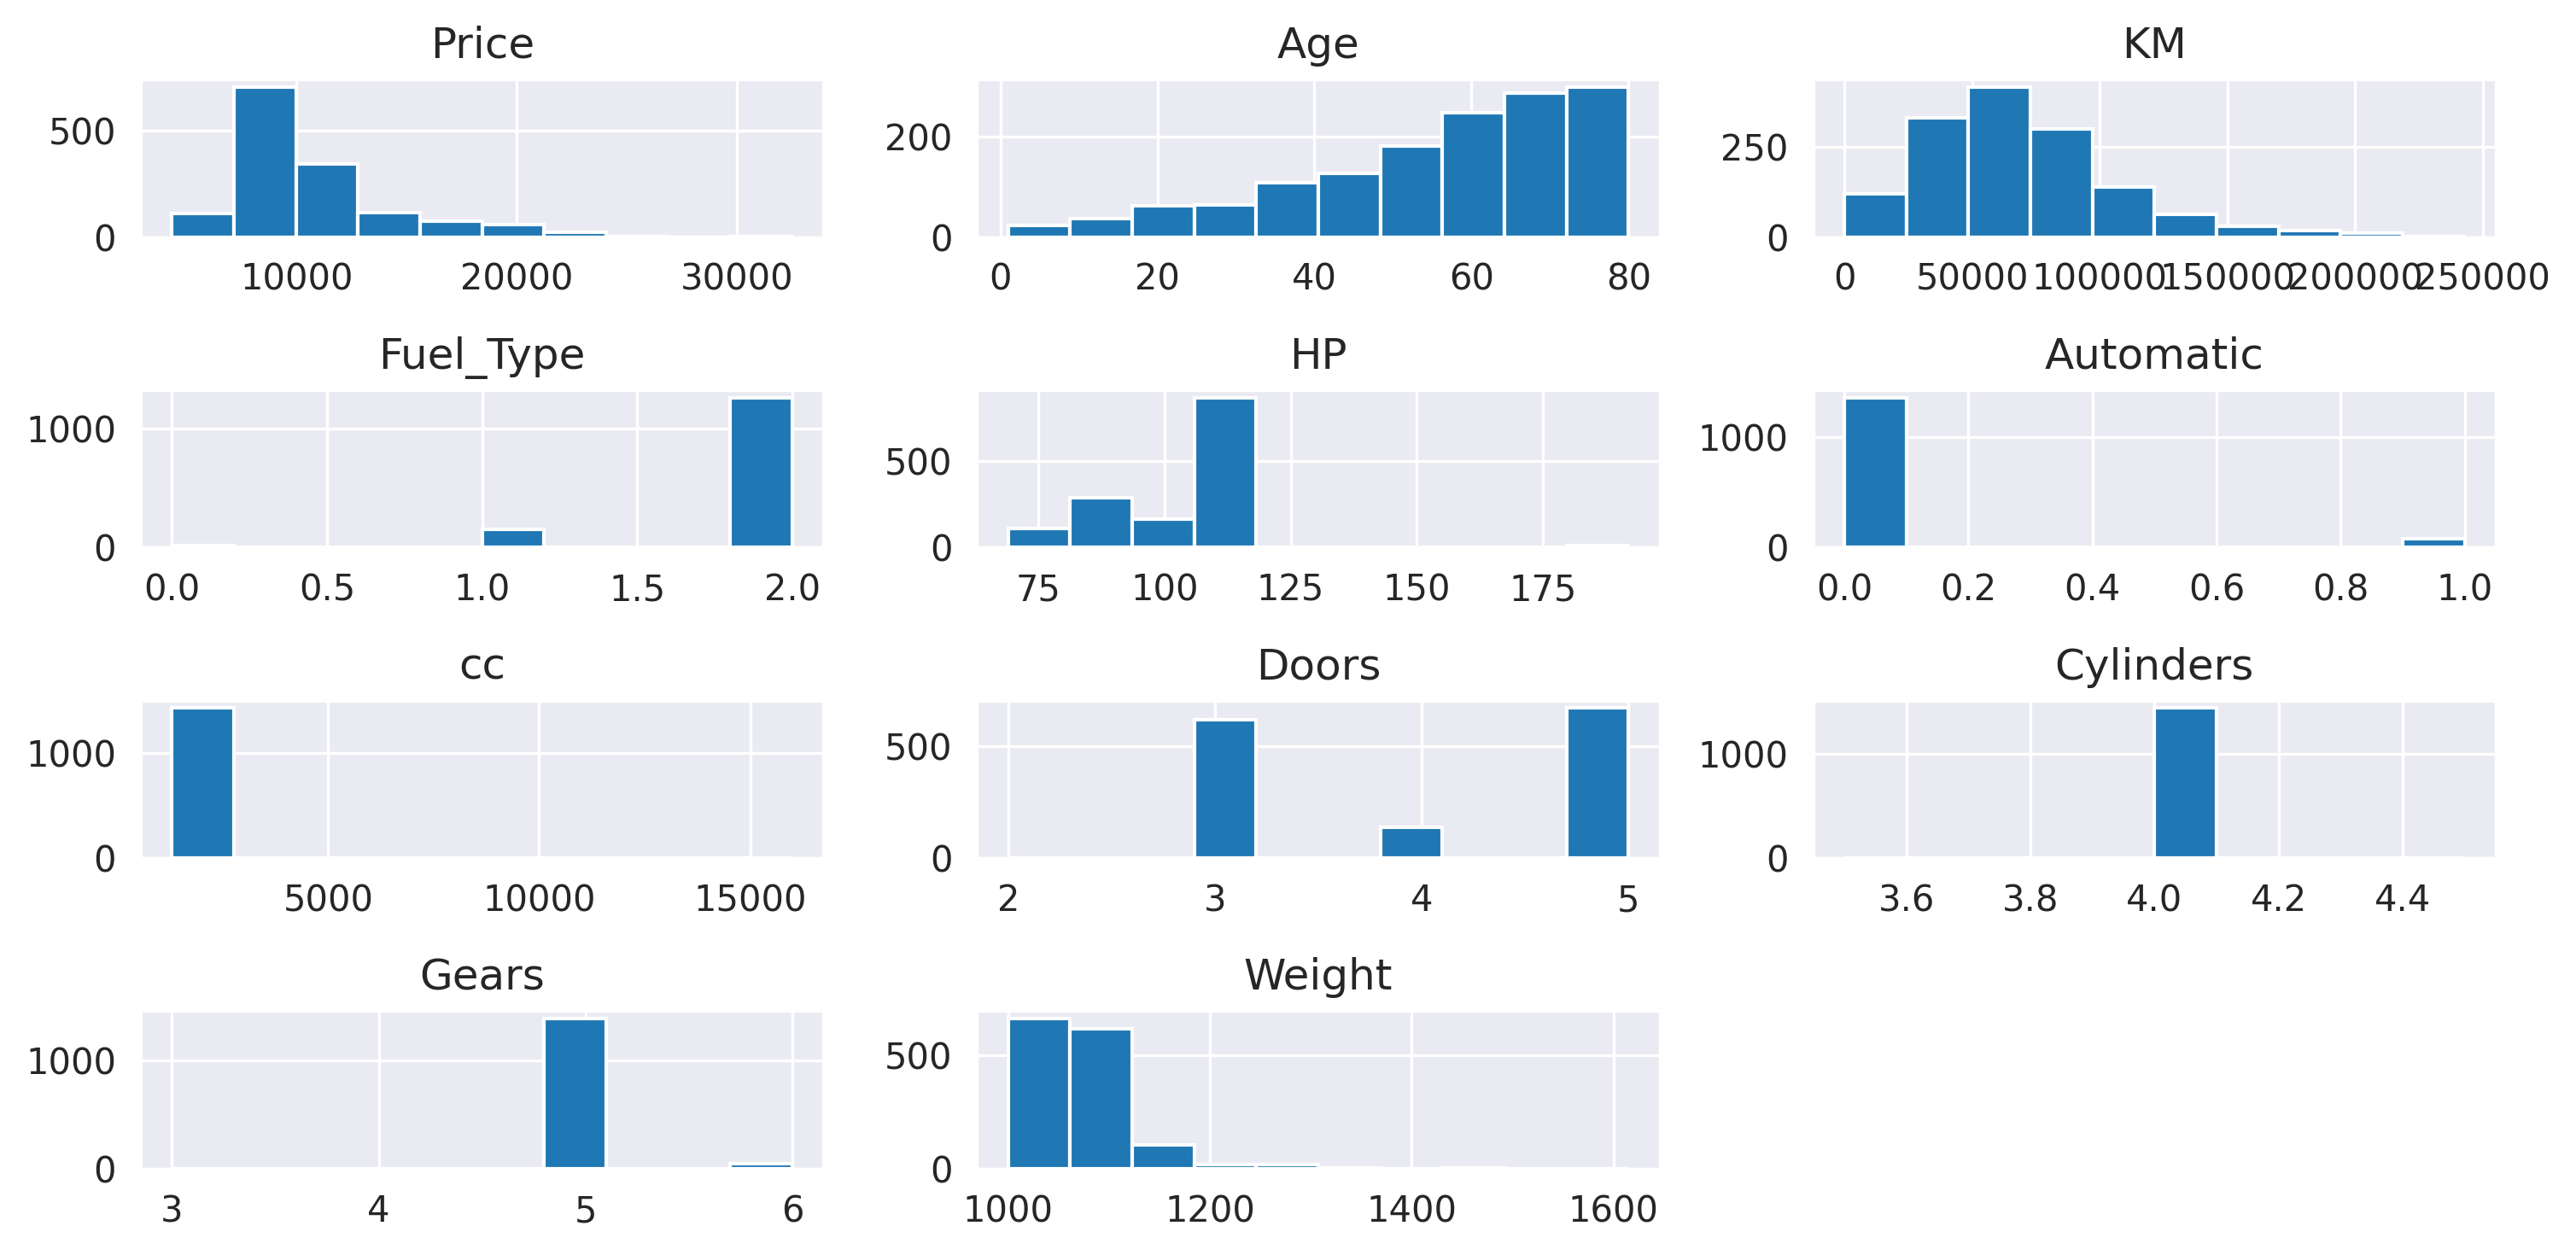

In [13]:
df.hist()
plt.tight_layout()

<Axes: >

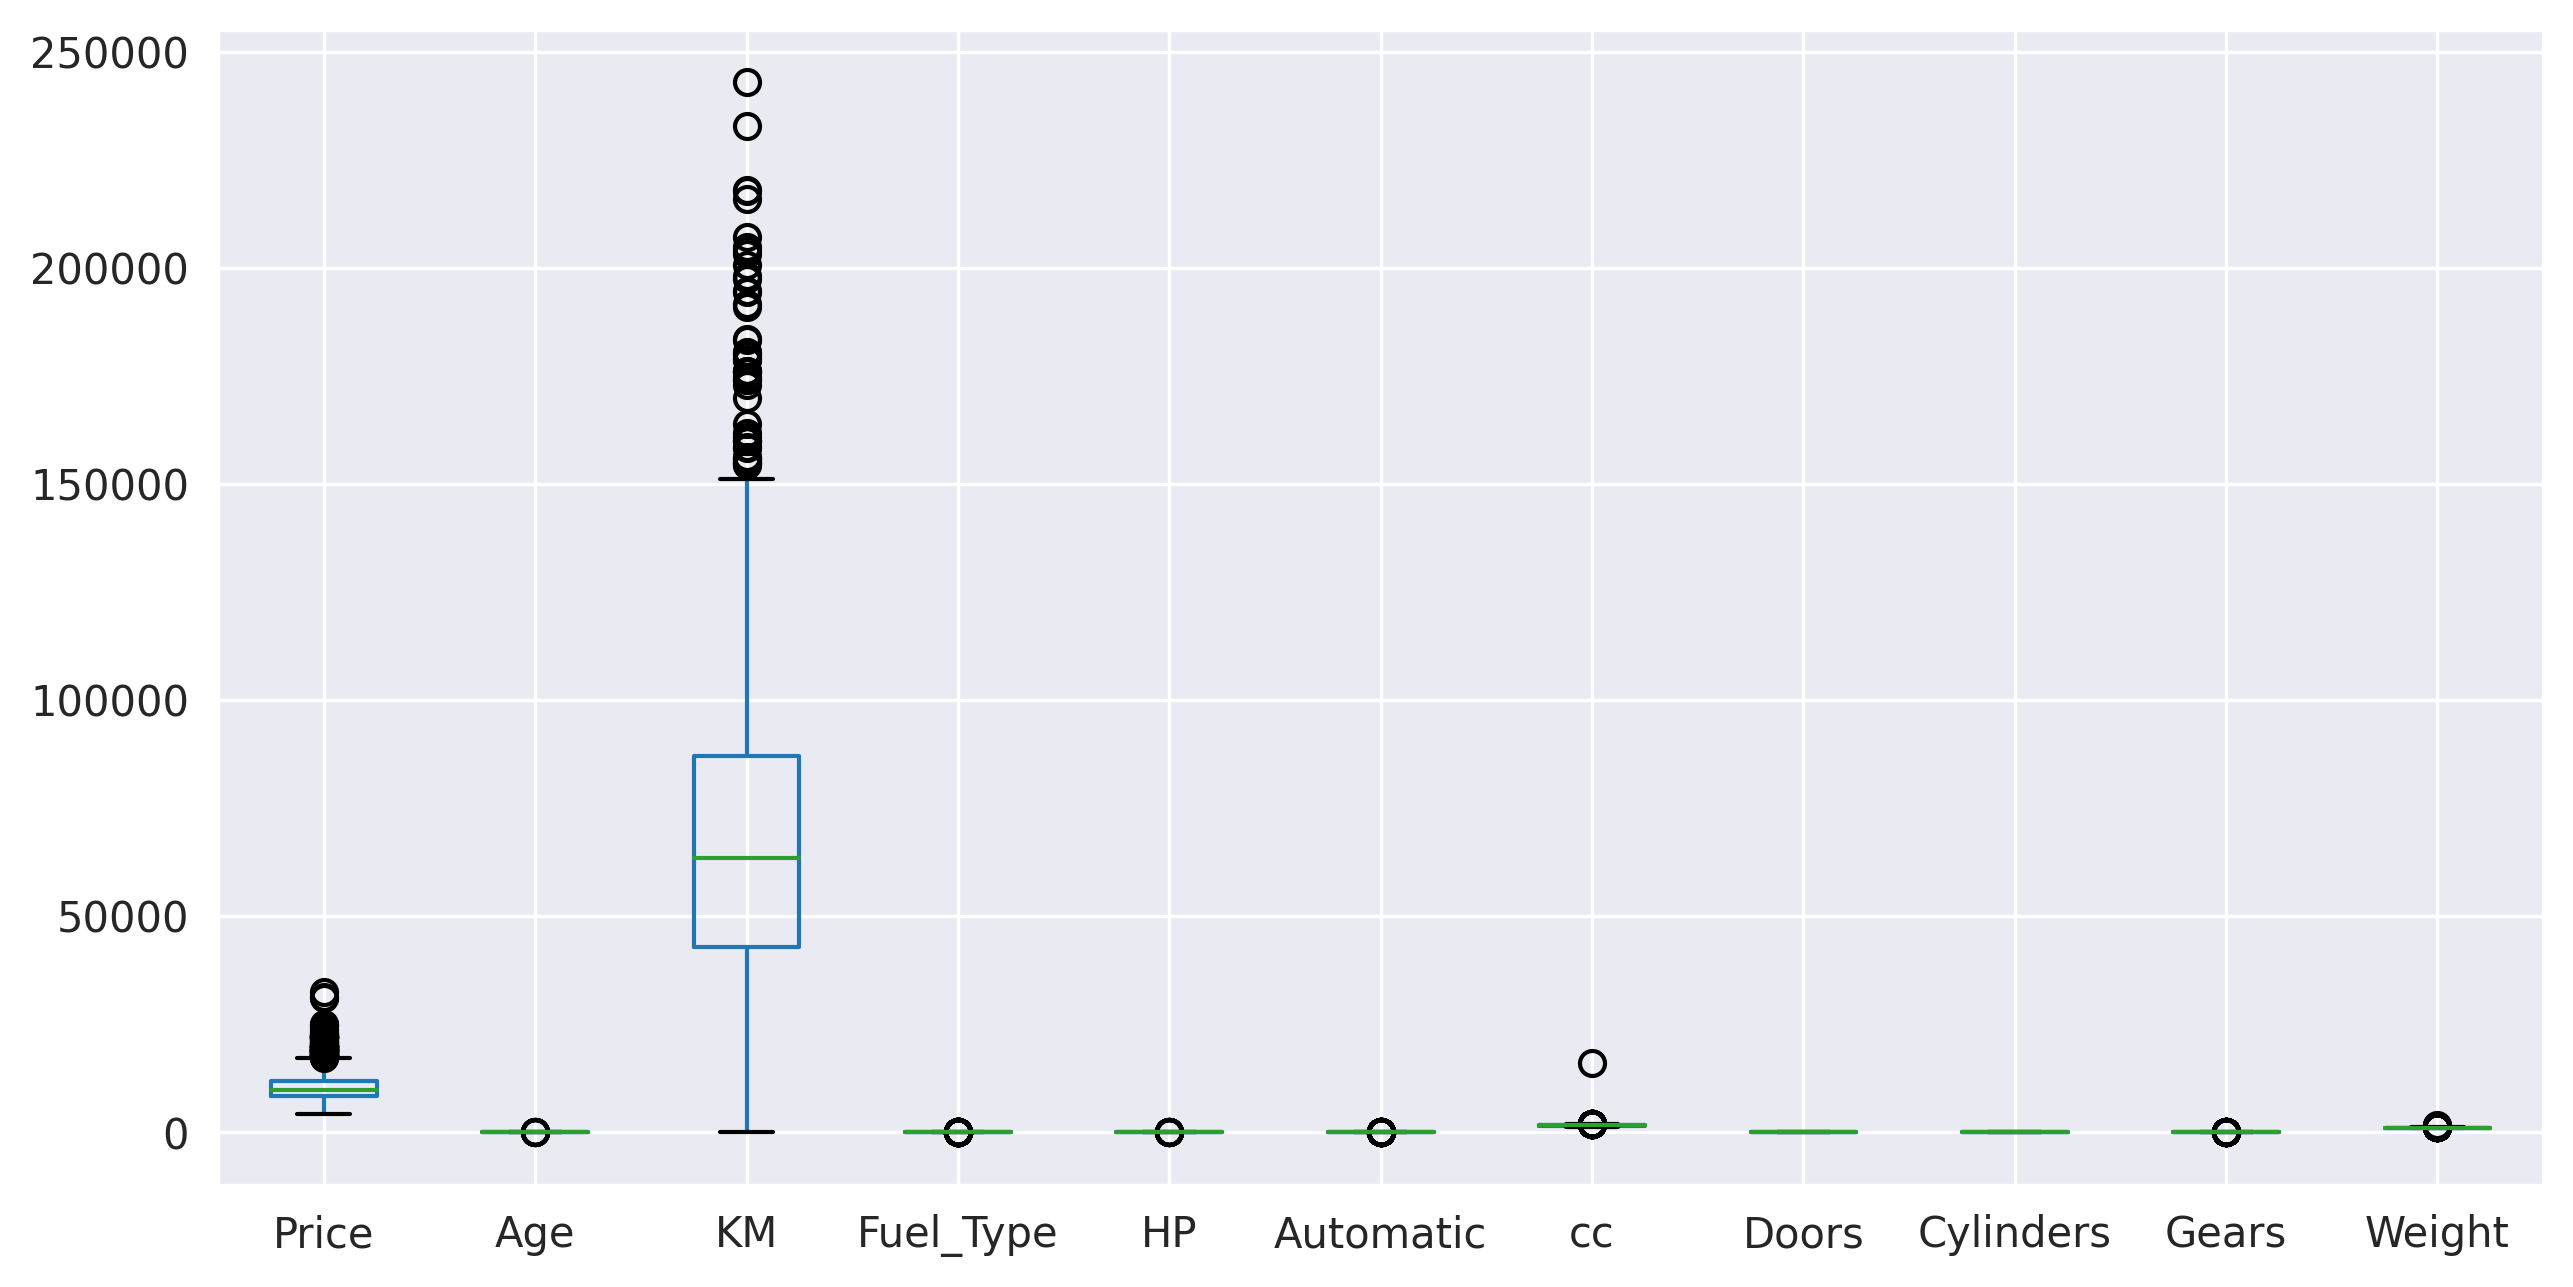

In [15]:
df.boxplot()

<Axes: xlabel='Price'>

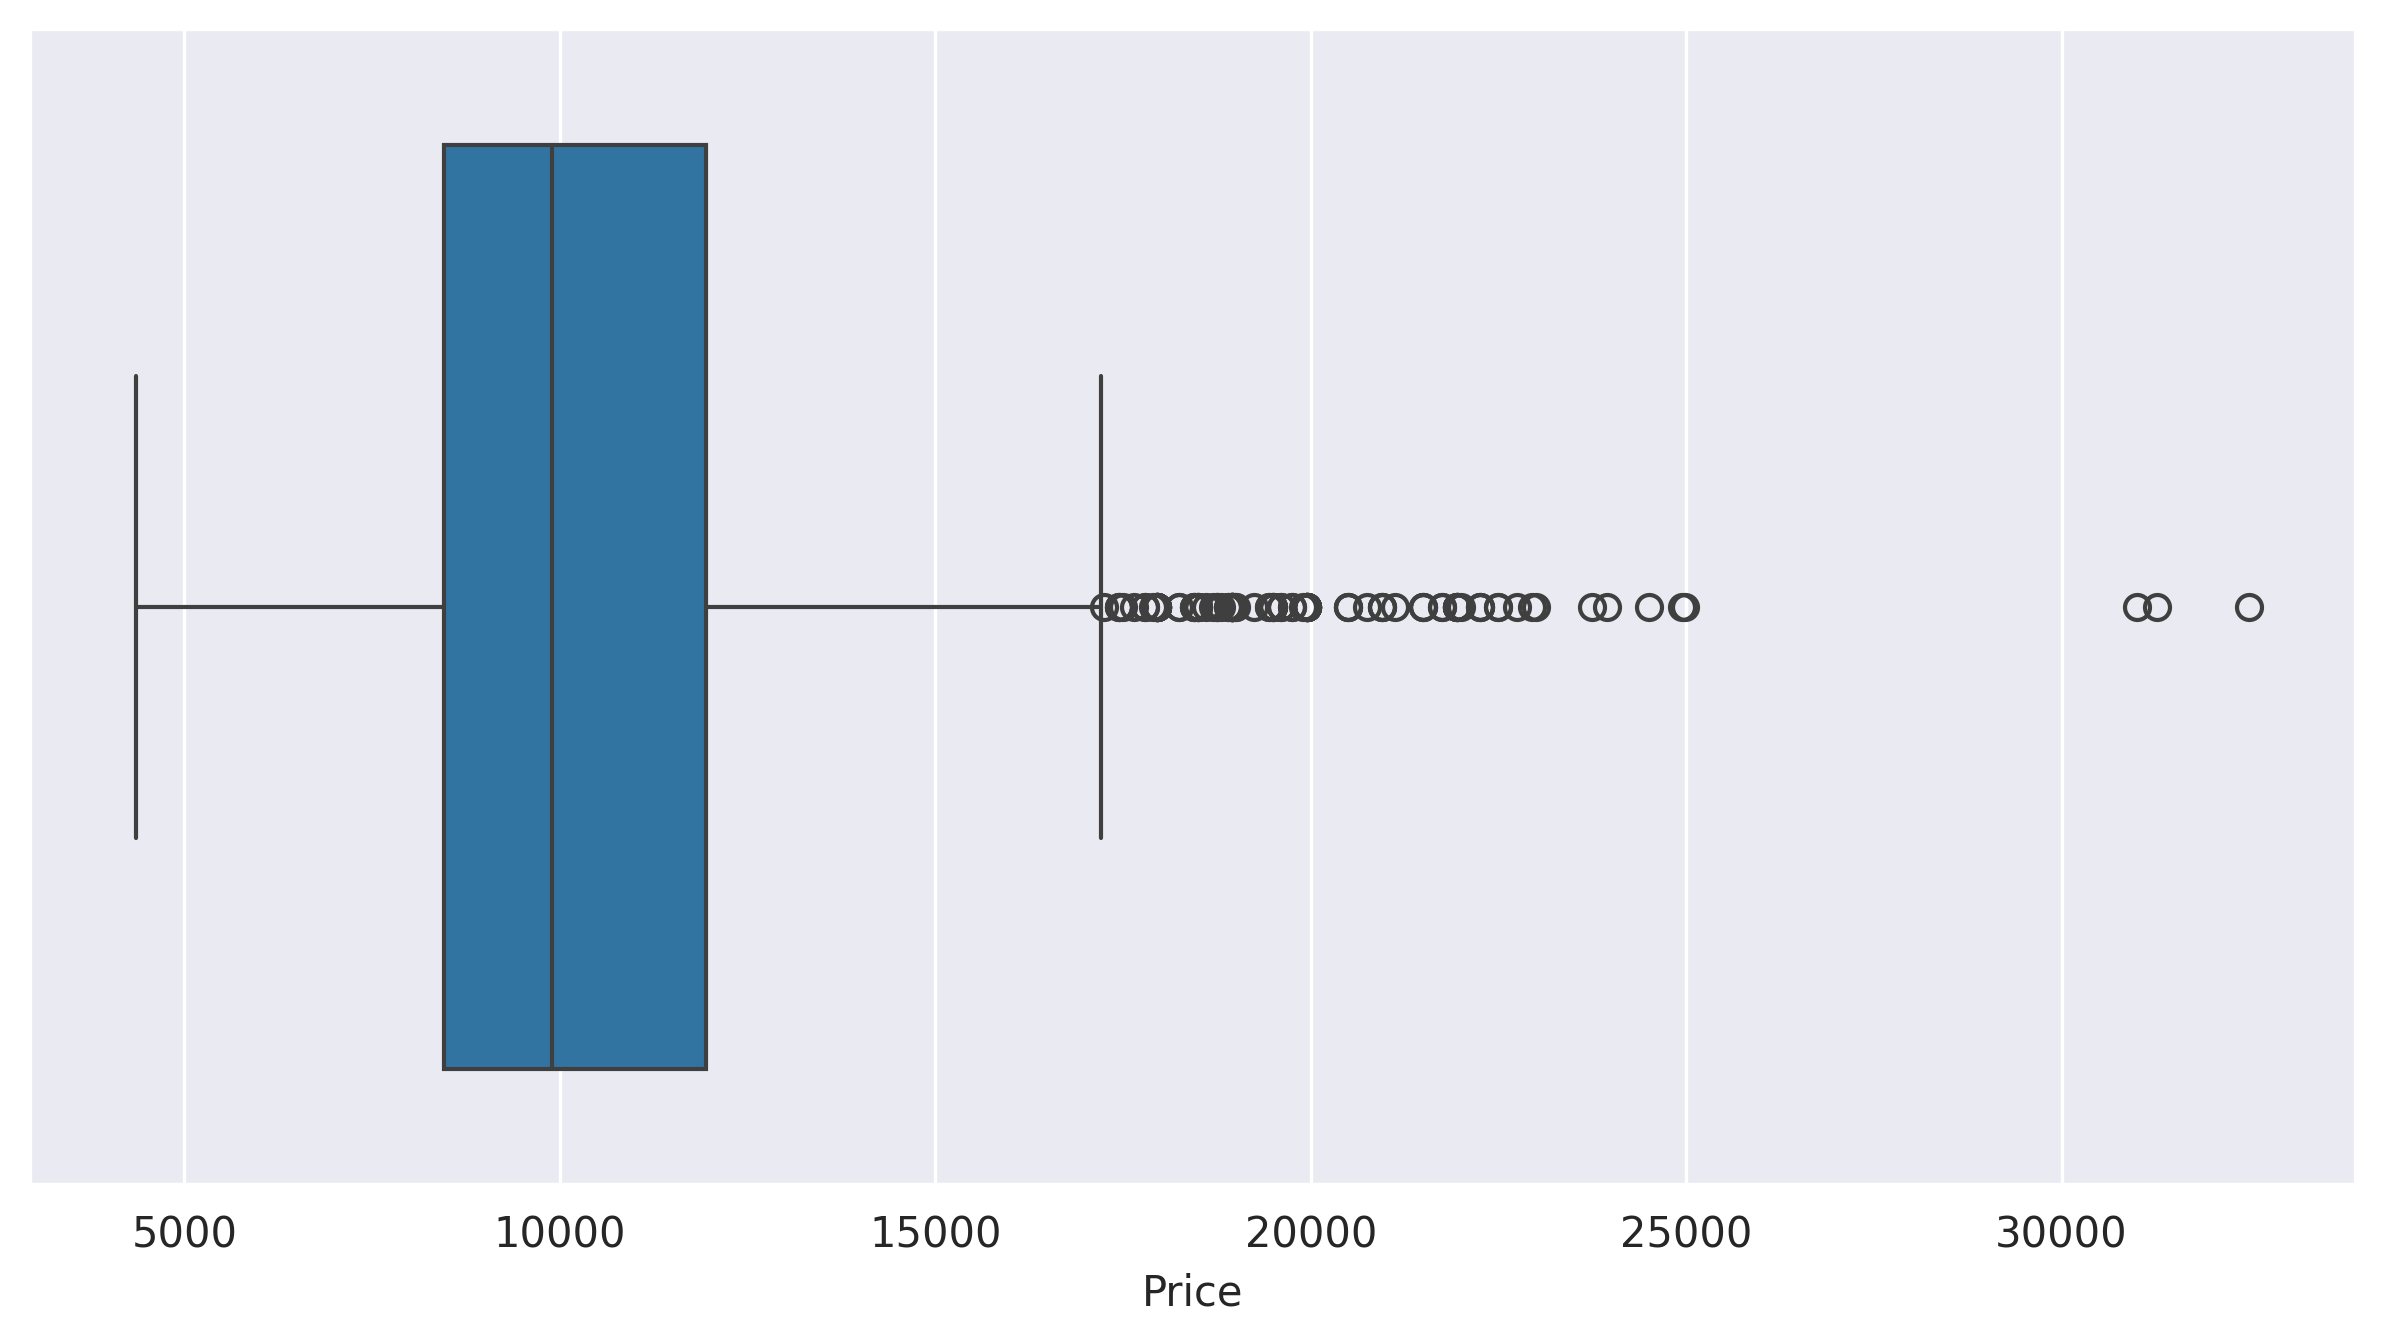

In [16]:
sns.boxplot(x=df['Price'])

In [19]:
def find_outliers_iqr(df, column):


    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return IQR , lower_bound, upper_bound


In [20]:
outliers = find_outliers_iqr(df, 'Price')
print(outliers)

(3500.0, 3200.0, 17200.0)


In [22]:
# dectect all the values which is greater than 17200 in price column
df[df['Price']>17200]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
7,18600,30,75889,1,90,0,2000,3,4,5,1245
8,21500,27,19700,2,192,0,1800,3,4,5,1185
10,20950,25,31461,2,192,0,1800,3,4,6,1185
11,19950,22,43610,2,192,0,1800,3,4,6,1185
12,19600,25,32189,2,192,0,1800,3,4,6,1185
...,...,...,...,...,...,...,...,...,...,...,...
182,21125,2,225,2,97,0,1400,5,4,5,1110
183,21500,2,15,2,110,0,1600,5,4,5,1130
184,17795,1,1,2,98,0,1400,4,4,5,1100
185,18245,1,1,2,110,0,1600,5,4,5,1075


In [23]:
df.loc[df['Price']>17200,'Price'] = 17200

In [24]:
df[df['Price']>17200]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight


<Axes: xlabel='Price'>

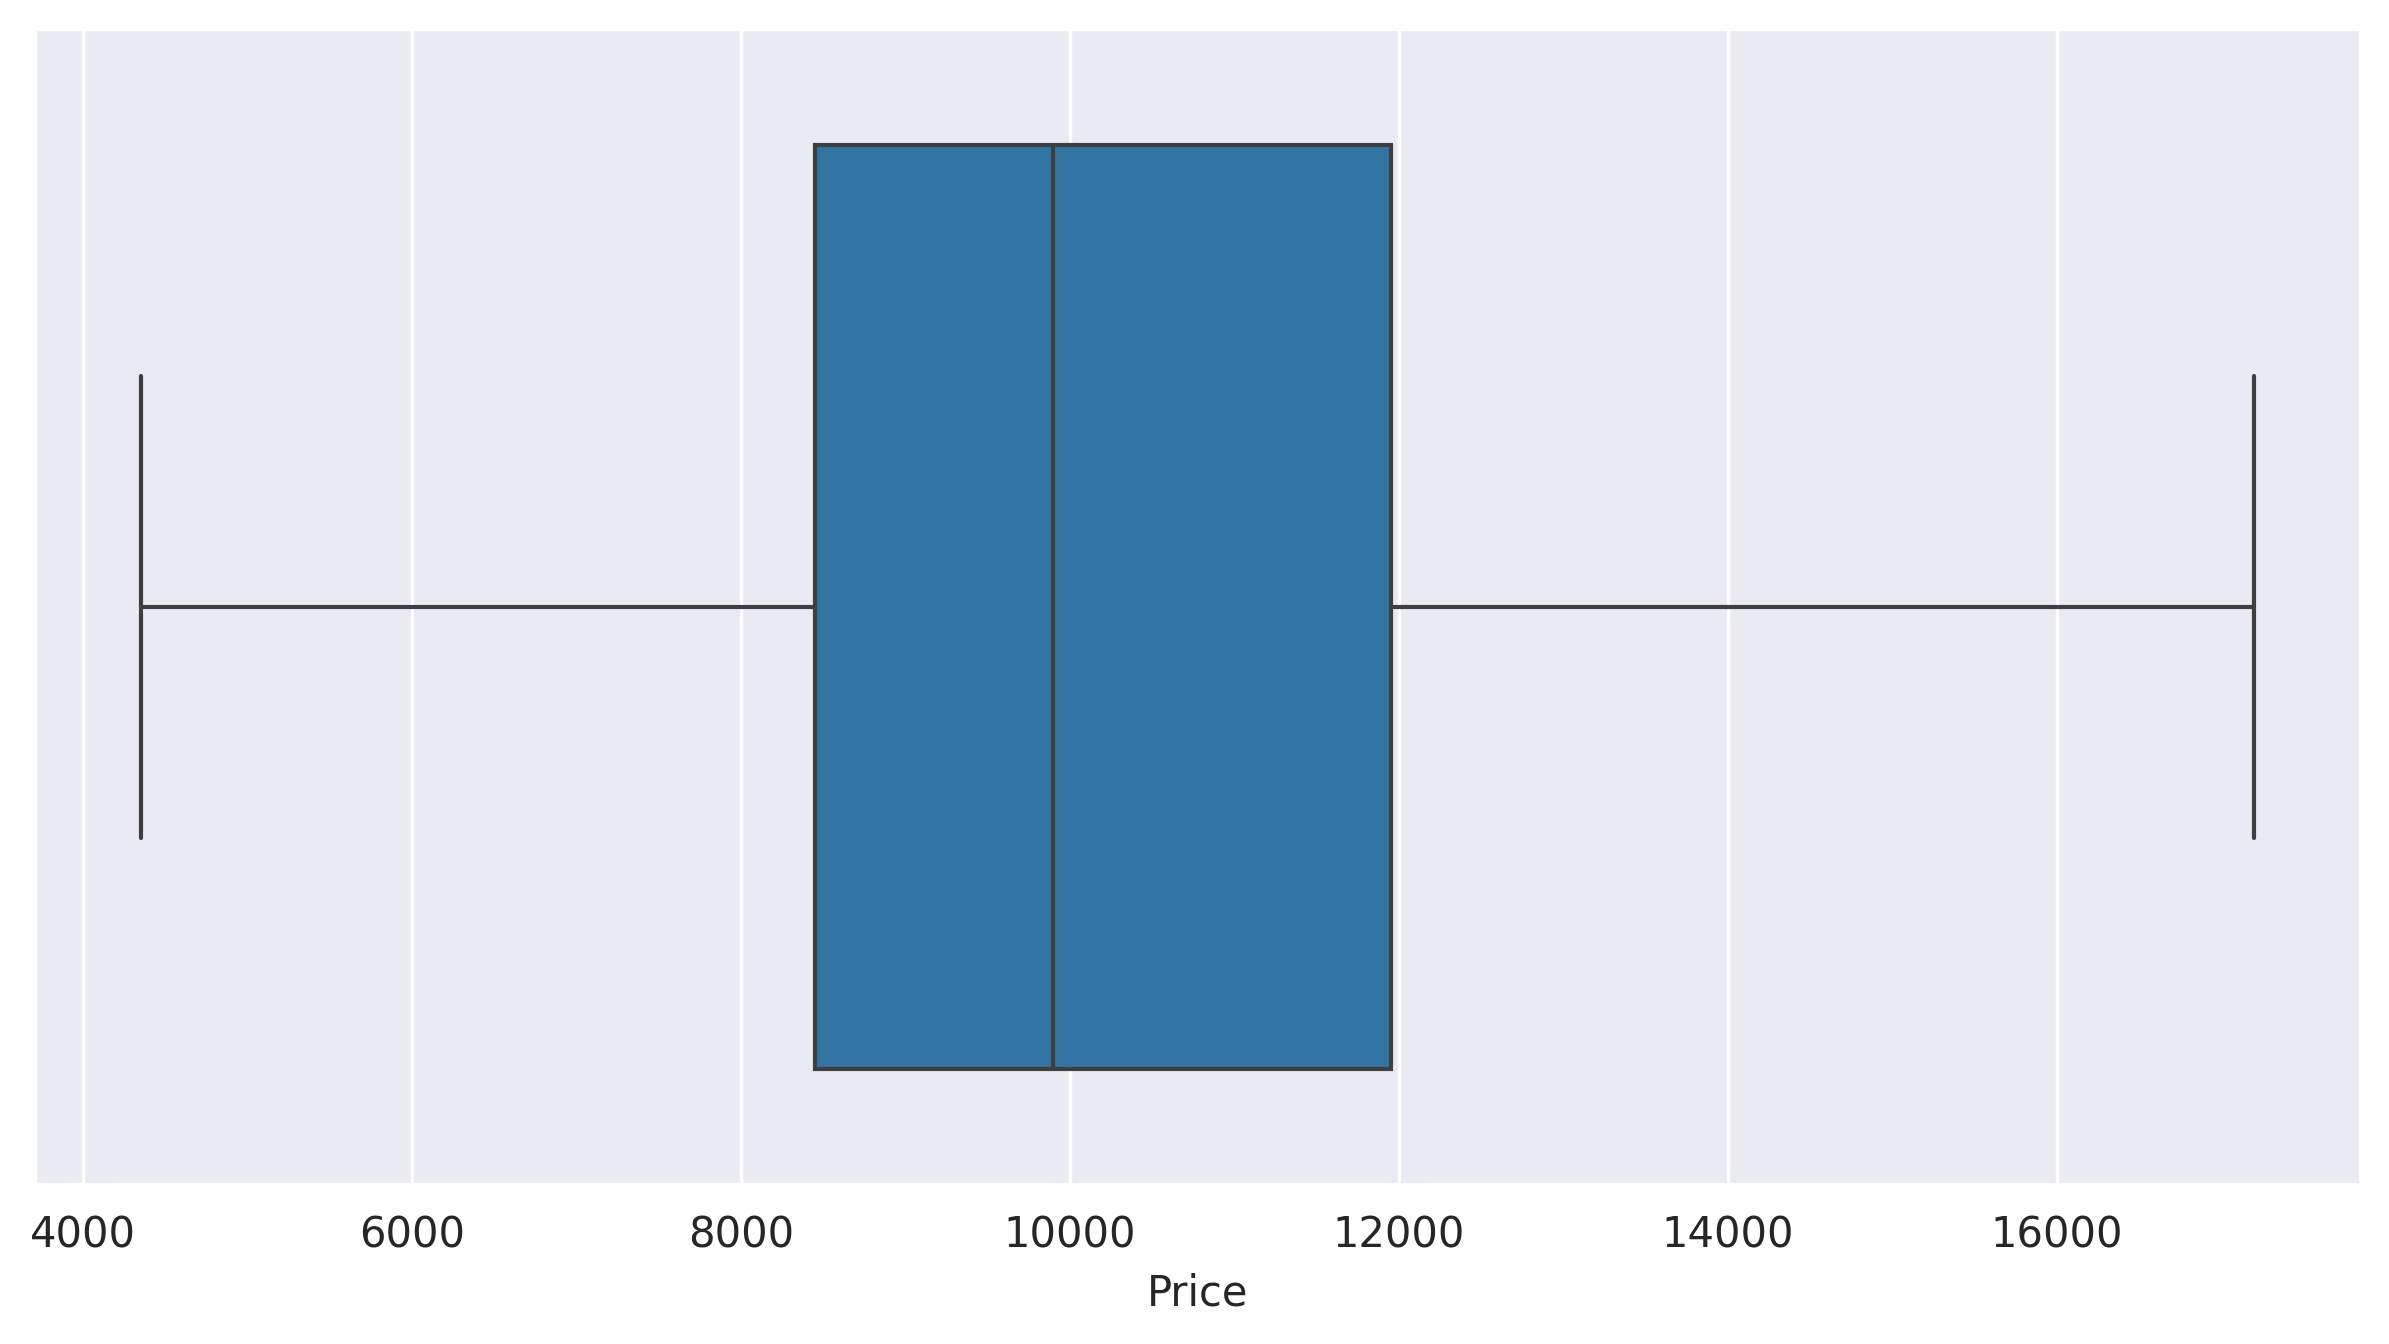

In [25]:
sns.boxplot(x=df['Price'])

In [26]:
# similarly we can detect outliers for other column and remove outliers
outliers = find_outliers_iqr(df, 'KM')
print(outliers)

(44041.5, -23062.25, 153103.75)


In [27]:
df.loc[df['KM']>153103.75,'KM'] = 153103.75

<ipython-input-27-370eec308142>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '153103.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['KM']>153103.75,'KM'] = 153103.75


In [28]:
df[df['KM']>153103.75]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight


<Axes: >

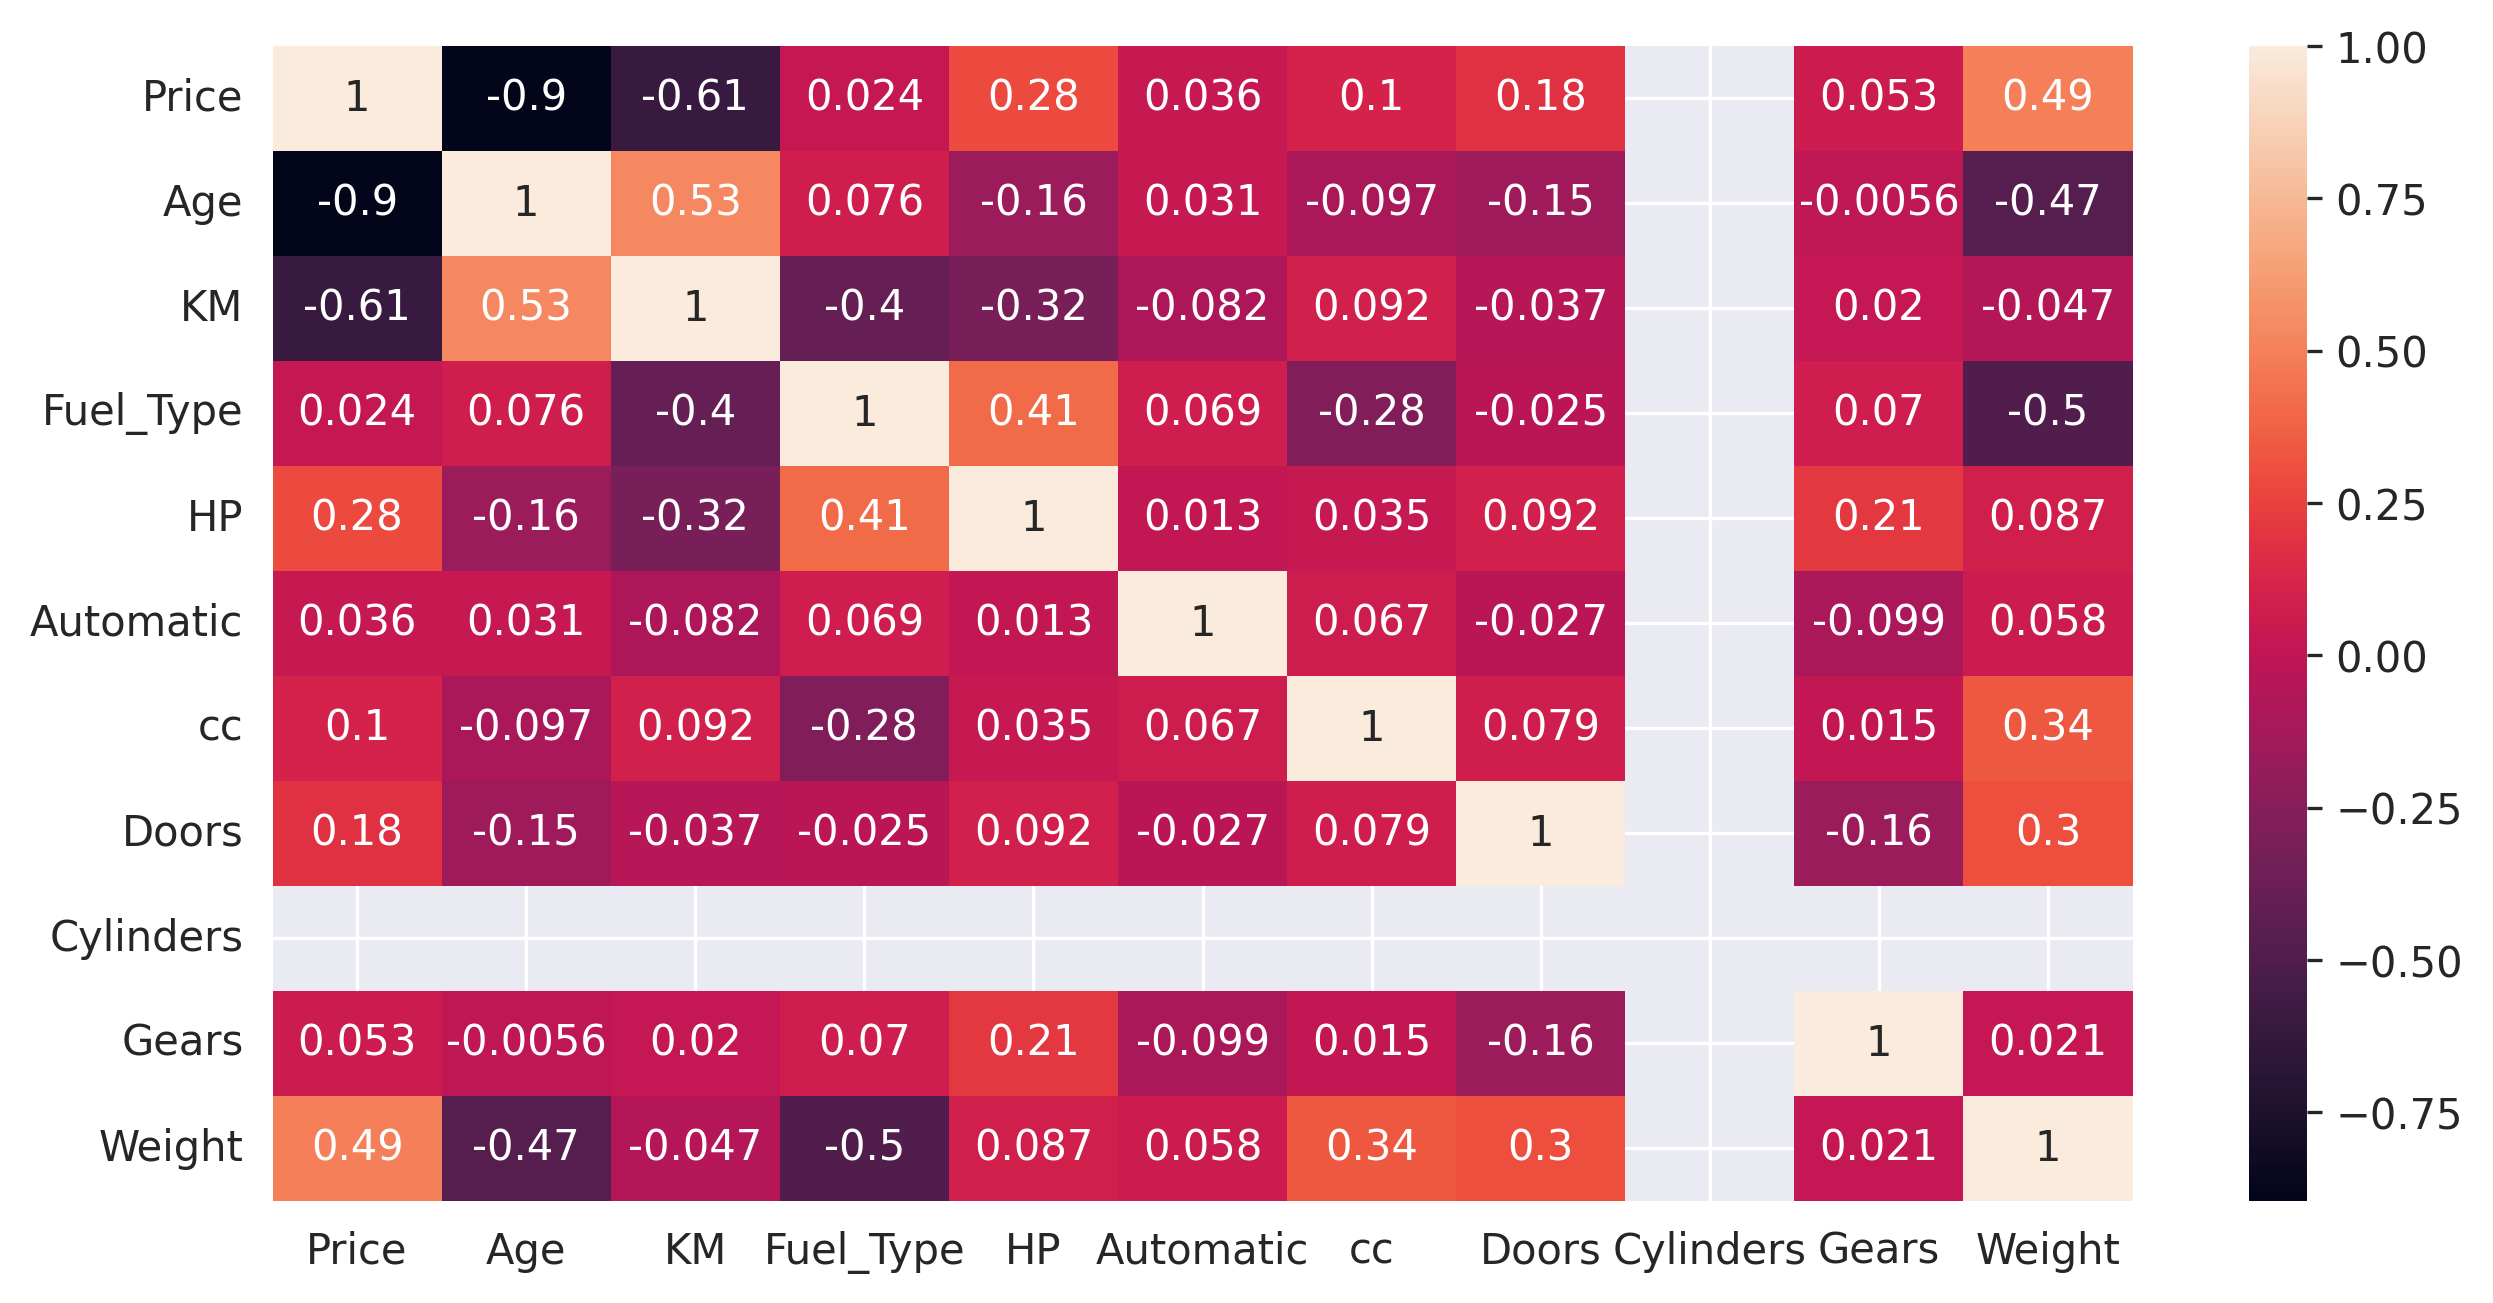

In [ ]:
x=df.drop(columns='Price')
x

,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,1,90,0,2000,3,4,5,1165
1,23,72937,1,90,0,2000,3,4,5,1165
2,24,41711,1,90,0,2000,3,4,5,1165
3,26,48000,1,90,0,2000,3,4,5,1165
4,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,2,86,0,1300,3,4,5,1025
1432,72,19000,2,86,0,1300,3,4,5,1015
1433,71,17016,2,86,0,1300,3,4,5,1015
1434,70,16916,2,86,0,1300,3,4,5,1015


In [ ]:
y=df['Price']
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
Model1 = LinearRegression()

In [ ]:
Model1.fit(x_train,y_train)
print('Model 1 coefficients:', Model1.coef_)

Model 1 coefficients: [-1.24127607e+02 -1.72177725e-02  2.24044654e+02  2.46551864e+01
  2.04218068e+02 -9.65280606e-01 -2.27539120e+01  4.66116035e-12
  6.59336293e+02  2.12725779e+01]


In [ ]:
x2=df[['Age','KM','HP']]
y2=df['Price']
x2_train,x2_test,y2_train,y2_test= train_test_split(x2,y2,test_size=0.2,random_state=0)

model2 = LinearRegression()
model2.fit(x2_train,y2_train)
print('model 2 coefficients:', model2.coef_)

model 2 coefficients: [-1.55986015e+02 -1.13987482e-02  3.28374114e+01]


In [ ]:
x3=df[['Age','KM','HP','Fuel_Type','Automatic','cc','Doors','Gears','Weight']]
y3=df['Price']
x3_train,x3_test,y3_train,y3_test= train_test_split(x3,y3,test_size=0.2,random_state=0)

model3 = LinearRegression()
model3.fit(x3_train,y3_train)
print('model 3 coefficients:', model3.coef_)

model 3 coefficients: [-1.24127607e+02 -1.72177725e-02  2.46551864e+01  2.24044654e+02
  2.04218068e+02 -9.65280606e-01 -2.27539120e+01  6.59336293e+02
  2.12725779e+01]


In [ ]:
# Make predictions on the testing data
y_pred1 = Model1.predict(x_test)
y_pred2 = model2.predict(x2_test)
y_pred3 = model3.predict(x3_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Evaluate the models
print('Model 1 R-squared:', r2_score(y_test, y_pred1))
print('Model 1 MSE:', mean_squared_error(y_test, y_pred1))
print('Model 1 RMSE:', mean_squared_error(y_test, y_pred1, squared=False))

print('model 2 R-squared:', r2_score(y2_test, y_pred2))
print('model 2 MSE:', mean_squared_error(y2_test, y_pred2))
print('model 2 RMSE:', mean_squared_error(y2_test, y_pred2, squared=False))

print('model 3 R-squared:', r2_score(y3_test, y_pred3))
print('model 3 MSE:', mean_squared_error(y3_test, y_pred3))
print('model 3 RMSE:', mean_squared_error(y3_test, y_pred3, squared=False))

Model 1 R-squared: 0.828009498016754
Model 1 MSE: 2137959.2435760573
Model 1 RMSE: 1462.1762012753652
model 2 R-squared: 0.8433941066715239
model 2 MSE: 1946718.0651215087
model 2 RMSE: 1395.2483883242828
model 3 R-squared: 0.8280094980167522
model 3 MSE: 2137959.243576081
model 3 RMSE: 1462.1762012753734


In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
# Create and fit Lasso model
lasso = Lasso(alpha=0.1) # You can adjust the alpha parameter
lasso.fit(x3_train, y3_train)

# Create and fit Ridge model
ridge = Ridge(alpha=0.1) # You can adjust the alpha parameter
ridge.fit(x3_train, y3_train)

Ridge(alpha=0.1)